<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-10" data-toc-modified-id="Exercise-10-1">Exercise 10</a></span></li><li><span><a href="#(a)-Summaries" data-toc-modified-id="(a)-Summaries-2">(a) Summaries</a></span><ul class="toc-item"><li><span><a href="#Numerical" data-toc-modified-id="Numerical-2.1">Numerical</a></span></li><li><span><a href="#Graphical" data-toc-modified-id="Graphical-2.2">Graphical</a></span></li></ul></li><li><span><a href="#(b)-Logistic-regression:-lags,-volume---&gt;-direction" data-toc-modified-id="(b)-Logistic-regression:-lags,-volume--->-direction-3">(b) Logistic regression: lags, volume --&gt; direction</a></span><ul class="toc-item"><li><span><a href="#statsmodel-provides-statistics-straight-out-of-the-box:" data-toc-modified-id="statsmodel-provides-statistics-straight-out-of-the-box:-3.1"><code>statsmodel</code> provides statistics straight out of the box:</a></span></li><li><span><a href="#But-for-the-rest-of-the-exercise,-use-sklearn-instead." data-toc-modified-id="But-for-the-rest-of-the-exercise,-use-sklearn-instead.-3.2">But for the rest of the exercise, use <code>sklearn</code> instead.</a></span></li></ul></li><li><span><a href="#(c)-Confusion-matrix" data-toc-modified-id="(c)-Confusion-matrix-4">(c) Confusion matrix</a></span></li><li><span><a href="#(d)-Train-test-split" data-toc-modified-id="(d)-Train-test-split-5">(d) Train-test split</a></span></li><li><span><a href="#(e-h)-LDA,-QDA,-KNN-1" data-toc-modified-id="(e-h)-LDA,-QDA,-KNN-1-6">(e-h) LDA, QDA, KNN-1</a></span></li><li><span><a href="#(i)-Explore-different-predictors-and-classifiers" data-toc-modified-id="(i)-Explore-different-predictors-and-classifiers-7">(i) Explore different predictors and classifiers</a></span></li></ul></div>

# Exercise 10
##### This question should be answered using the `Weekly` data set, which is part of the ISLR package. This data is similar in nature to the `Smarket` data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

##### *On `Smaket`:* This data set consists of percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005. For each date, we have recorded the percentage returns for each of the ﬁve previous trading days, `Lag1` through `Lag5`. We have also recorded `Volume` (the number of shares traded on the previous day, in billions), `Today` (the percentage return on the date in question) and `Direction` (whether the market was Up or Down on this date).

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_palette('bone')
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import statsmodels.formula.api as smf
from IPython.display import display
from util import get_data

In [2]:
data = get_data('Weekly.csv')

# (a) Summaries
##### Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

In [3]:
direction_code = {'Down': 0, 'Up': 1}

## Numerical

In [4]:
data = data.replace(direction_code)
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.555556
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.000000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000


## Graphical

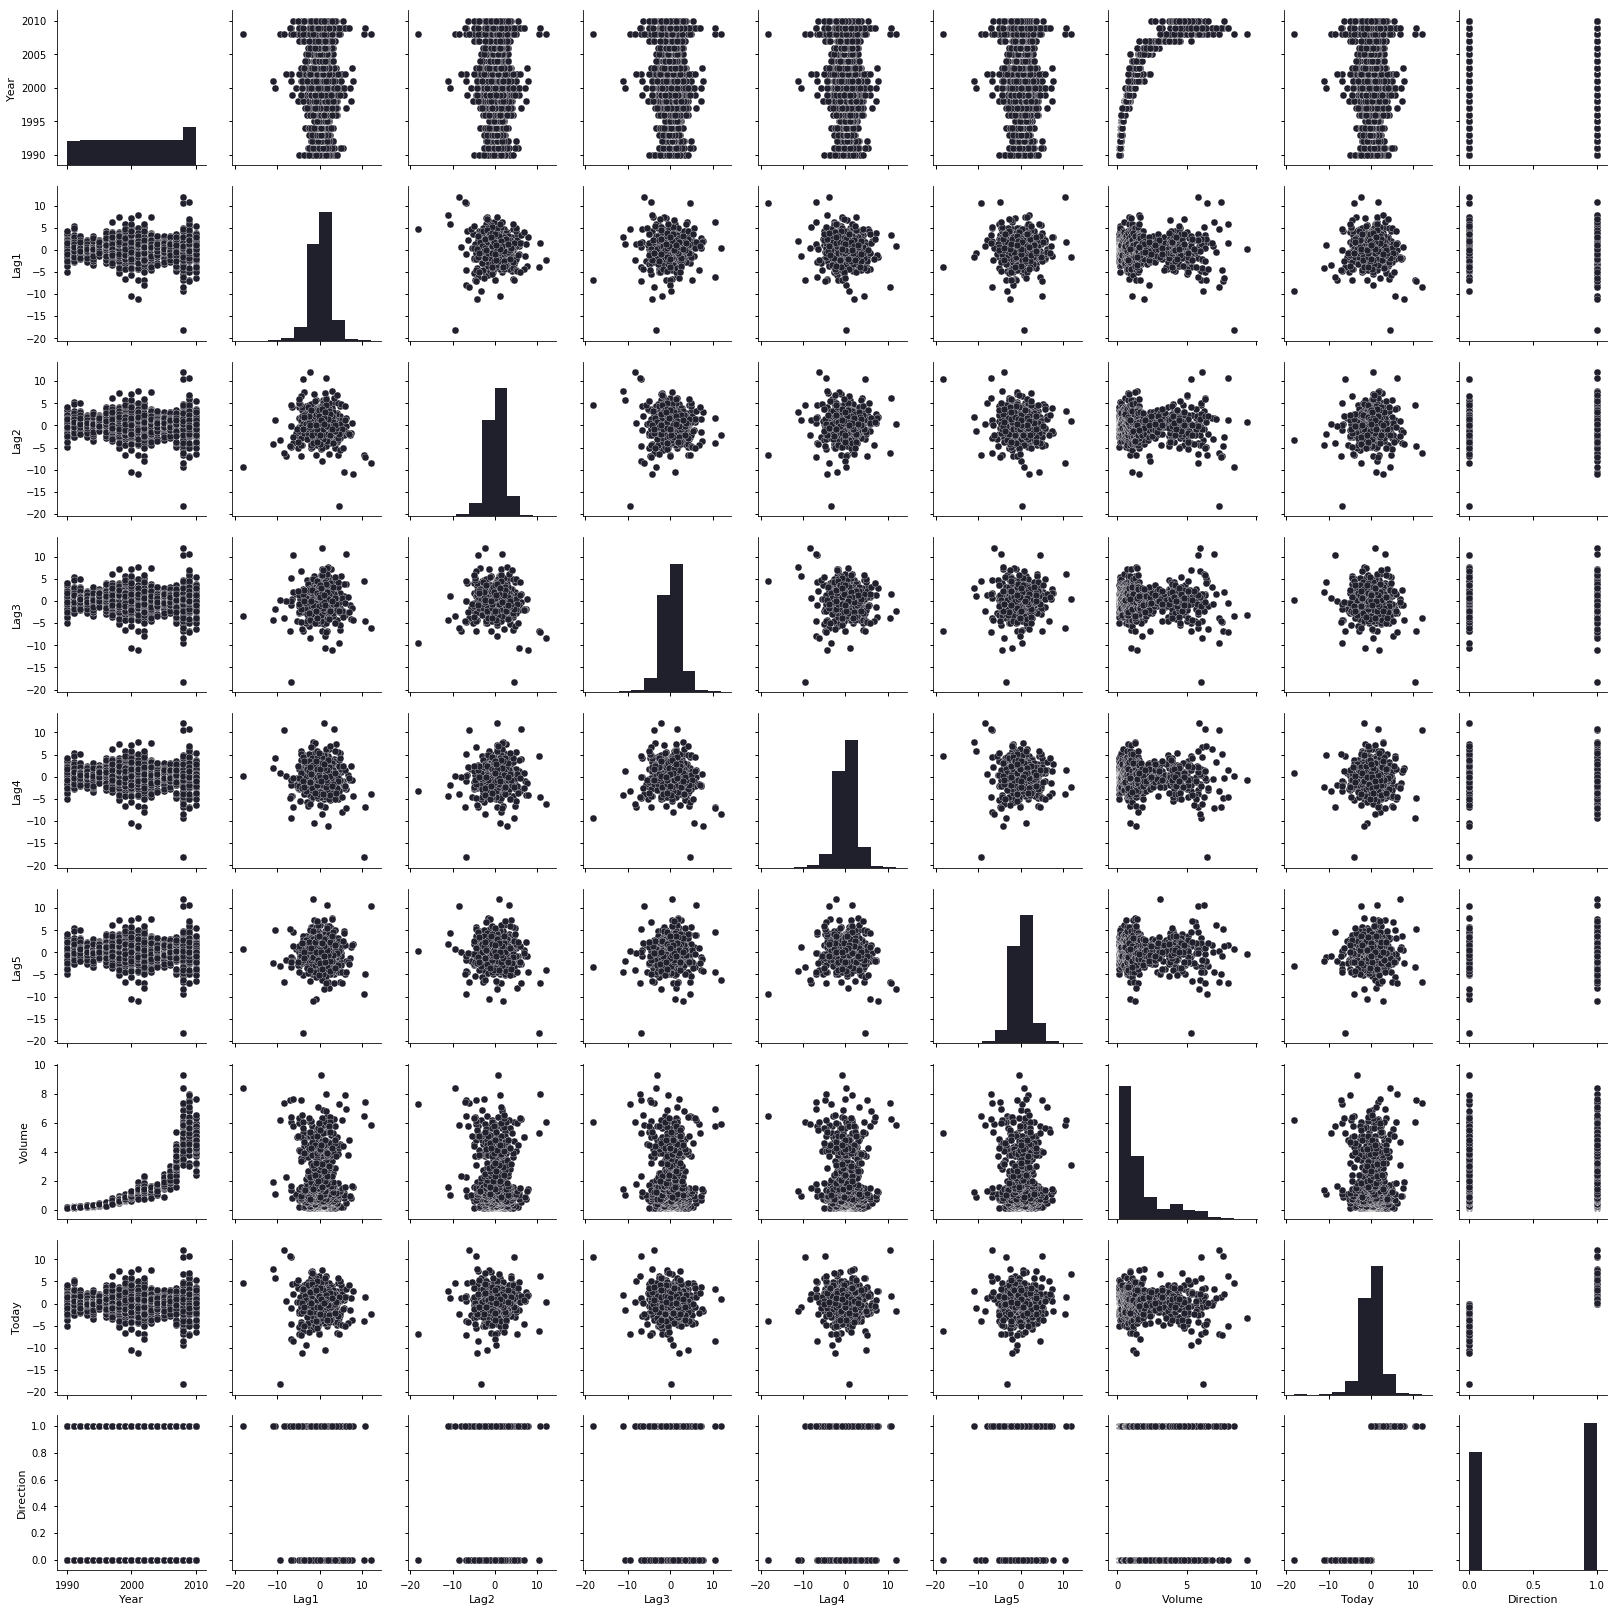

In [5]:
sns.pairplot(data)

"Year" and "Volume" are positively correlated: As the years went by (from 1990 to 2010), the volume of stocks traded increased.

# (b) Logistic regression: lags, volume --> direction
##### Use the full data set to perform a logistic regression with `Direction` as the response and the ﬁve lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically signiﬁcant? If so, which ones?

## `statsmodel` provides statistics straight out of the box:

In [6]:
logreg = smf.logit('Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data=data).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 30 Jul 2018   Pseudo R-squ.:                0.006580
Time:                        20:02:26   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Lag2 has a coefficient with p < 0.05

## But for the rest of the exercise, use `sklearn` instead.

In [7]:
X = data.filter(regex='Lag|Volume')
X.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,0.712,3.514,-2.576,-0.270,0.816,0.153728


In [8]:
y = data.Direction
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Direction, dtype: int64

In [9]:
clf = LogisticRegression()
clf.fit(X, y)
pd.DataFrame(clf.coef_, columns=X.columns, index=['coefficient'])

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
coefficient,-0.041173,0.05847,-0.015991,-0.0277,-0.014403,-0.022128


# (c) Confusion matrix
##### Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [10]:
confuse_mat = pd.DataFrame(confusion_matrix(y, clf.predict(X)), index=direction_code.keys(), \
                           columns=['Predicted_' + di for di in direction_code.keys()])
confuse_mat/len(y)

,Predicted_Down,Predicted_Up
Down,0.050505,0.393939
Up,0.043159,0.512397


The model is heavily biased towards predicting "up".

# (d) Train-test split
##### Now ﬁt the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [11]:
# Train
train_set = data.Year<=2008
X_train = data.Lag2[train_set].values.reshape(-1,1)
y_train = data.Direction[train_set]
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Test
X_test = data.Lag2[~train_set].values.reshape(-1,1)
truth = data.Direction[~train_set]
prediction = clf.predict(X_test)

print('LogReg correct rate:', np.count_nonzero(prediction==truth)/len(X_test))
confuse_mat = pd.DataFrame(confusion_matrix(truth, prediction), index=direction_code.keys(), \
                           columns=['Predicted_' + di for di in direction_code.keys()])
confuse_mat/len(X_test)

LogReg correct rate: 0.625


,Predicted_Down,Predicted_Up
Down,0.086538,0.326923
Up,0.048077,0.538462


# (e-h) LDA, QDA, KNN-1
##### Repeat (d) using LDA.

##### Repeat (d) using QDA.

##### Repeat (d) using KNN with K = 1.

##### Which of these methods appears to provide the best results on this data?

In [12]:
for method, clf in zip(['LDA', 'QDA', 'KNN-1'], \
                       [LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(), KNeighborsClassifier(1)]):
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)

    print(method, 'correct rate:', np.count_nonzero(prediction==truth)/len(X_test))
    confuse_mat = pd.DataFrame(confusion_matrix(truth, prediction), index=direction_code.keys(), \
                               columns=['Predicted_' + di for di in direction_code.keys()])
    display(confuse_mat/len(X_test))

LDA correct rate: 0.625


,Predicted_Down,Predicted_Up
Down,0.086538,0.326923
Up,0.048077,0.538462


QDA correct rate: 0.5865384615384616


,Predicted_Down,Predicted_Up
Down,0.0,0.413462
Up,0.0,0.586538


KNN-1 correct rate: 0.49038461538461536


,Predicted_Down,Predicted_Up
Down,0.201923,0.211538
Up,0.298077,0.288462


Logistic regression and LDA have the best results.

# (i) Explore different predictors and classifiers
##### Experiment with diﬀerent combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classiﬁer.

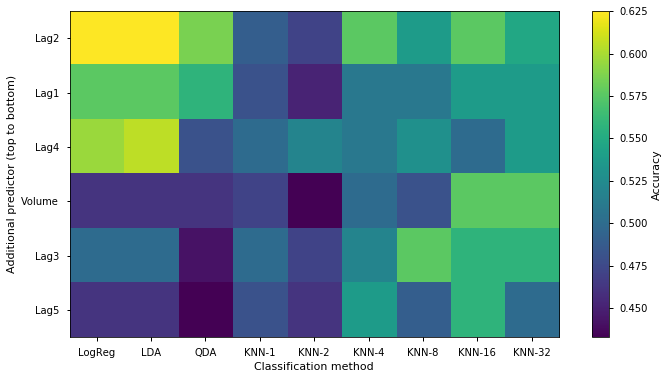

In [13]:
# Sorted predictors by statistical significance
predictors_list = list(logreg.pvalues[1:].index[np.argsort(logreg.pvalues[1:])])

# Size of neighbourhood to test
knlist = [1, 2, 4, 8, 16, 32]
clf_list = ['LogReg', 'LDA', 'QDA'] + ['KNN-'+str(kn) for kn in knlist]

accuracy_mat = np.zeros((len(predictors_list), len(clf_list)))
predictors = []

for i, pred in enumerate(predictors_list):
    
    predictors += [pred]  # cumulative list o predictors
    X_train = data.filter(predictors)[train_set].values.reshape(-1,len(predictors))
    X_test = data.filter(predictors)[~train_set].values.reshape(-1,len(predictors))
        
    for j, clf in enumerate([LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()] + [KNeighborsClassifier(kn) for kn in knlist]):
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        accuracy_mat[i,j] = accuracy_score(truth, prediction)
        
fig, ax = plt.subplots(figsize=(12,6))
imax = ax.imshow(accuracy_mat)
cax = fig.colorbar(imax)
cax.set_label('Accuracy')
ax.set_yticks(np.arange(len(predictors_list)))
ax.set_yticklabels(predictors_list)
ax.set_ylabel('Additional predictor (top to bottom)')
ax.set_xticks(np.arange(len(clf_list)))
ax.set_xticklabels(clf_list)
ax.set_xlabel('Classification method')
plt.show()